In [1]:
import os

os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/michael_dev/RA2_alpine_lads/ra_joint_predictions')

In [2]:
from utils.config import Config

config = Config()

In [3]:
from model.joint_detection import create_hand_joint_detector, create_foot_joint_detector

hand_detector = create_hand_joint_detector(config)

foot_detector = create_foot_joint_detector(config)

In [4]:
from prediction.joint_detection import dream_joint_detector

hand_dataset, feet_dataset = dream_joint_detector(config, hand_detector, foot_detector).create_dream_datasets(config.train_fixed_location)

image_name    UAB050-LH
file_type           jpg
flip                  N
mcp_x           1202.85
mcp_y           894.019
pip_2_x         907.831
pip_2_y          501.54
pip_3_x         716.409
pip_3_y         453.051
pip_4_x         508.194
pip_4_y         522.307
pip_5_x         323.101
pip_5_y         674.432
mcp_1_x         1079.48
mcp_1_y          1041.6
mcp_2_x         868.619
mcp_2_y         755.698
mcp_3_x         703.926
mcp_3_y         739.084
mcp_4_x          559.45
mcp_4_y          787.81
mcp_5_x         431.017
mcp_5_y         852.698
w1_x            846.236
w1_y            1222.91
w2_x            671.121
w2_y             1309.9
w3_x            526.207
w3_y            1181.15
Name: 0, dtype: object


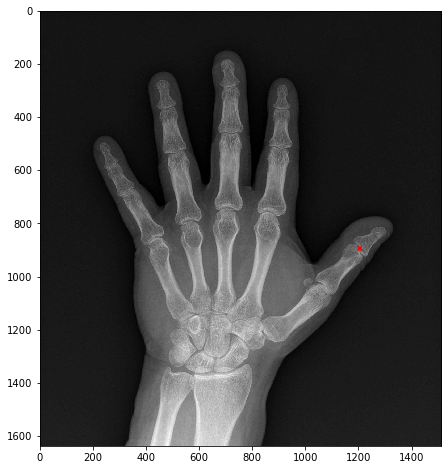

In [25]:
import dataset.ops.image_ops as img_ops
import matplotlib.pyplot as plt

vals = hand_dataset.iloc[0]

print(vals)

img, y = img_ops.load_image([vals['image_name'], 'jpg', vals['flip']], [], config.train_location)

plt.figure(figsize = (8, 8))
plt.imshow(img[:, :, 0], cmap="gray")
plt.scatter(vals['mcp_x'], vals['mcp_y'], 20, c = 'red', marker = 'x')
plt.show()

coord_x          357.706
coord_y          663.756
erosion_0              0
image_name     UAB001-RF
key                mtp_4
narrowing_0            0
Name: 4, dtype: object


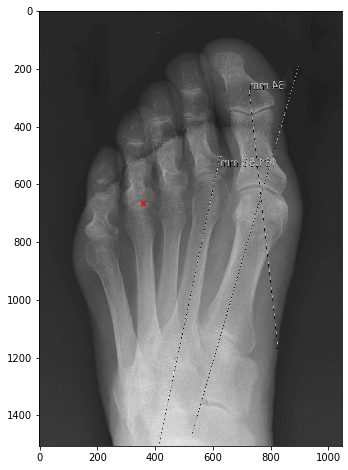

In [9]:
vals = feet_dataset.iloc[4]

print(vals)

img, y = img_ops.load_image([vals['image_name'], 'jpg', 'Y'], [], config.train_location)

plt.figure(figsize = (8, 8))
plt.imshow(img[:, :, 0], cmap="gray")
plt.scatter(vals['coord_x'], vals['coord_y'], 20, c = 'red', marker = 'x')
plt.show()

In [10]:
from prediction.joint_detection import rsna_joint_detector

rsna_dataset = rsna_joint_detector(config, hand_detector).create_rnsa_dataset()

In [12]:
rsna_dataset.to_csv('./data/rsna_joint_data.csv')

boneage           135
coord_x       510.736
coord_y       493.962
image_name      10004
key             pip_4
sex                 1
Name: 3, dtype: object


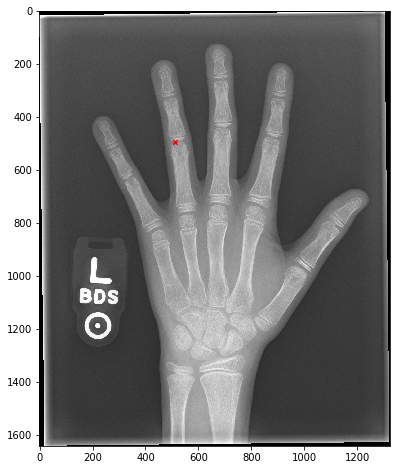

In [11]:
import dataset.ops.image_ops as img_ops
import matplotlib.pyplot as plt

vals = rsna_dataset.iloc[3]

print(vals)

img, y = img_ops.load_image([vals['image_name'], 'png', 'N'], [], '../rsna_boneAge/checked_rsna_training')

plt.figure(figsize = (8, 8))
plt.imshow(img[:, :, 0], cmap="gray")
plt.scatter(vals['coord_x'], vals['coord_y'], 20, c = 'red', marker = 'x')
plt.show()